## Deep Neural Network - Lab Task 1 by Mohsin Ali Mirza k200353

### Note

THIS CODE IS HEAVILY CHANGED FROM THE ORIGINAL CODE, THIS CODE WILL NOW HANDLE ANY H AMOUNT OF HIDDEN LAYERS WHICH CAN BE CHANGED BY ADDING MORE NUMBERS IN NEURONSINHIDDENLAYER VARIABLE. YOU CAN ALSO SPECIFY THE NUMBER OF NEURONS YOU WANT IN EACH OF THE HIDDEN LAYER, MAKING THIS CODE VERY FLEXIBLE TO USE. MOREOVER, YOU DON'T HAVE TO CHANGE ANY OTHER METHODS FOR TAKING INTO ACCOUNT OF MULTIPLE HIDDEN LAYERS, EVERYTHING IS TAKEN INTO ACCOUNT AUTOMATICALLY

TASKS ARE LOCATED BELOW

In [125]:
# OLD IMPLEMENTATION
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers[0], inputFeatures)
    W2 = np.random.randn(neuronsInHiddenLayers[1],neuronsInHiddenLayers[0])
    W3 = np.random.randn(outputFeatures, neuronsInHiddenLayers[1])
    b1 = np.zeros((neuronsInHiddenLayers[0], 1))
    b2 = np.zeros((neuronsInHiddenLayers[1], 1))
    b3 = np.zeros((outputFeatures, 1))
     
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2,
                  "W3" : W3, "b3": b3}
    return parameters

if we have 2x4 matrix of W1 and X matrix of 4x2 then W1*X which is np.dot() in python would look like <br />
[1 2 3 4 <br />
5 6 7 8] <br />
and bias would be 2x1 <br />
[0.5 -0.5] <br />
which would need to be changed to 2x4 matrix using np.tile(b1, (1,X.shape[1]) but python does this for u so <br />
[0.5 0.5 0.5 0.5 <br />
-0.5 -0.5 -0.5 -0.5]

### Algorthims, And Functions

In [88]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt
import random

In [89]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [90]:
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    
    listOfNeuronSizes = [inputFeatures] + list(neuronsInHiddenLayers) + [outputFeatures]
    #convert it into a Numpy Array
    listOfNeuronSizes = np.array(listOfNeuronSizes)
    
    #or do it like this
    #listOfNeuronSizes = np.concatenate([inputFeatures],neuronsInHiddenLayers,[outputFeatures])
    
    
    Weights = []
    biases = []
    for i in range(len(listOfNeuronSizes)-1):
        weight_matrix = np.random.randn(listOfNeuronSizes[i+1], listOfNeuronSizes[i])
        Weights.append(weight_matrix)
        biases_matrix = np.zeros((listOfNeuronSizes[i+1],1))
        biases.append(biases_matrix)

    parameters = {}
    for i in range(len(Weights)):
        parameters[f"W{i+1}"] = Weights[i]
        parameters[f"b{i+1}"] = biases[i]
        
    return parameters


In [159]:
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    noOfLayers = int(len(parameters)/2)
    w = [0]
    b = [0]
    for i in range (noOfLayers):
        w.append(parameters[f"W{i+1}"]) 
        b.append(parameters[f"b{i+1}"])
        
    #Z represents before signmoid
    #A represents after signmoid
    
    Z = [0]
    A = [0]
    
    #Z1 = np.dot(W1, X) + b1
    #Z2 = np.dot(W1,A1) + b2
    for i in range(noOfLayers):
        if(i==0):
            z = np.dot(w[i+1], X) +  b[i+1]
        else:
            z = np.dot(w[i+1],A[i]) + b[i+1]
        Z.append(z)
        A.append(sigmoid(Z[i+1]))
        
        
#     Z1 = np.dot(w[1], X) +  b[1]
#     A1 = sigmoid(Z1)
#     Z2 = np.dot(w[2], A1) +  b[2] 
#     A2 = sigmoid(Z2)
#     Z3 = np.dot(w[3],A2) +  b[3]
#     A3 = sigmoid(Z3)

    #Pack Into A Cache
    cache = []
    for i in range(noOfLayers):
        cache.append((Z[i+1],A[i+1],w[i+1],b[i+1]))   
    
    logprobs = np.multiply(np.log(A[noOfLayers]), Y) + np.multiply(np.log(1 - A[noOfLayers]), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A[noOfLayers]

In [162]:
# Backward Propagation
def backwardPropagation(X, Y, cache, noOfLayers):
    m = X.shape[1]
    
    #Unpack From Cache
    Z = [0]
    A = [0]
    W = [0]
    b = [0]
    
    for i in range(noOfLayers):
        temp_Z,temp_A,temp_w,temp_b = cache[i]
        Z.append(temp_Z)
        A.append(temp_A)
        W.append(temp_w)
        b.append(temp_b)
        
    
     
        # Backpropagation
    dZ = {}
    dW = {}
    db = {}

    dZ[noOfLayers] = A[noOfLayers] - Y
    dW[noOfLayers] = np.dot(dZ[noOfLayers], A[noOfLayers - 1].T) / m
    db[noOfLayers] = np.sum(dZ[noOfLayers], axis=1, keepdims=True) / m

    for i in range(noOfLayers - 1, 0, -1):
        dA = np.dot(W[i + 1].T, dZ[i + 1])
        dZ[i] = np.multiply(dA, np.multiply(A[i], 1 - A[i]))
        if i == 1:
            dW[i] = np.dot(dZ[i], X.T) / m
        else:
            dW[i] = np.dot(dZ[i], A[i - 1].T) / m
            
        db[i] = np.sum(dZ[i], axis=1, keepdims=True) / m

    # Pack gradients into dictionary
    gradients = {}
    for i in range(noOfLayers):
        gradients[f"dZ{i+1}"] = dZ[i+1]
        gradients[f"dW{i+1}"] = dW[i+1]
        gradients[f"db{i+1}"] = db[i+1]
        
    return gradients


In [95]:
def updateParameters(parameters, gradients, learningRate):
    noOfLayers = int(len(parameters)/2)
    
    # parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    
    for i in range (noOfLayers):
        parameters[f"W{i+1}"] = parameters[f"W{i+1}"] - learningRate * gradients[f"dW{i+1}"]
        parameters[f"b{i+1}"] = parameters[f"b{i+1}"] - learningRate * gradients[f"db{i+1}"]
    return parameters

### Driver Code

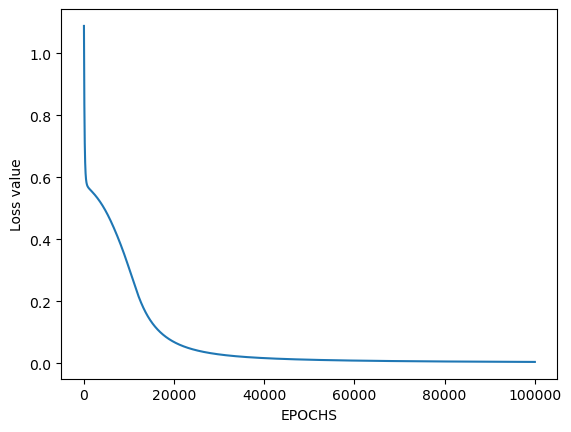

[[0. 1. 0. 0.]]


In [96]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

## Task 1

### Hidden Layer = 2   </br> No Of Neurons in First Hidden Layer = 2 </br> No Of Neurons in First Hidden Layer = 3

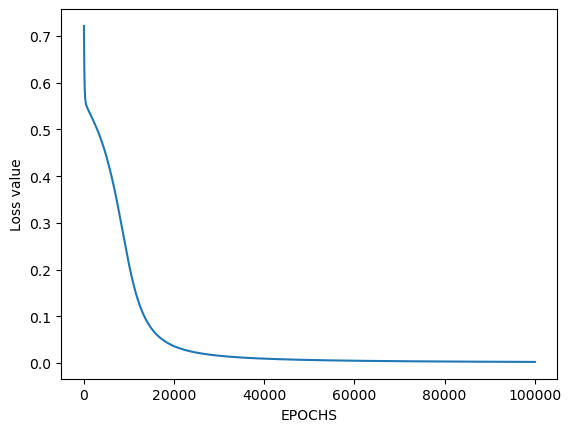

[[0. 1. 0. 0.]]


In [98]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2,3]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

#### the jump between 0 and 20000 is more quicker with more hidden Layers but it doesnt seem to reduce the number of epochs for minimizing the cost function to 0

## Task 2

### Hidden Layer = 1   </br> No Of Neurons in First Hidden Layer = 2 </br> Epoch = 40000

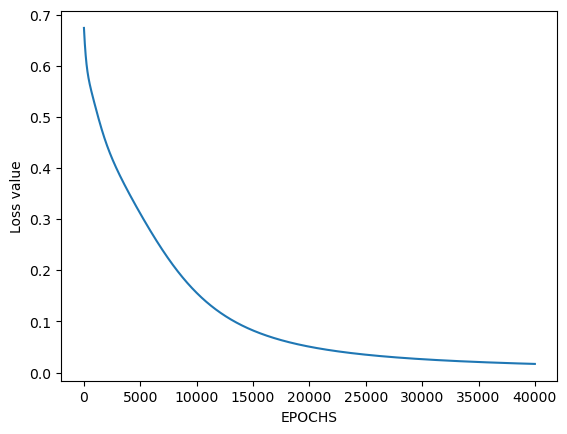

[[0. 1. 0. 0.]]


In [101]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 40000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

## Task 3

### Hidden Layer = 1   </br> No Of Neurons in First Hidden Layer = 2 </br> Epoch = 10000 </br> Learning Rate = 0.03

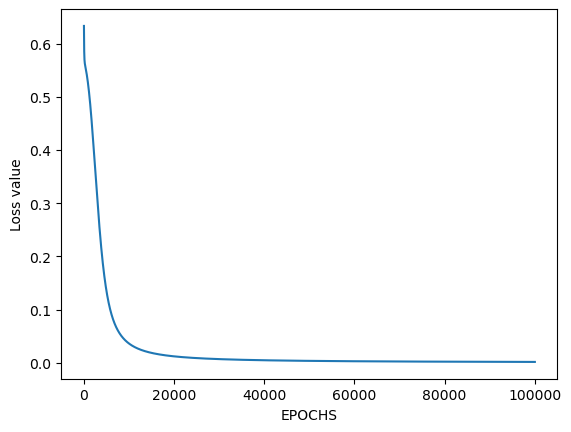

[[0. 1. 0. 0.]]


In [105]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 100000
learningRate = 0.03
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

#### we can see that by increasing the learning Rate the cost function is now minimized to 0 at 20000 which was intially being minimized to 40000 with learning rate = 0.01

### Hidden Layer = 2   </br> No Of Neurons in First Hidden Layer = 2 </br> No Of Nuerons in Second Hidden Layer = 2 </br> Epoch = 20000 </br> Learning Rate = 0.03

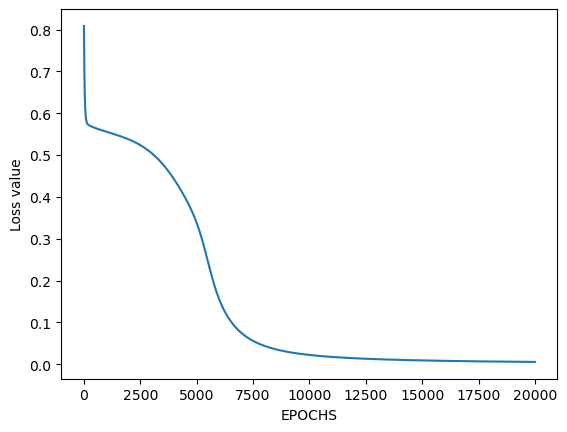

[[0. 1. 0. 0.]]


In [117]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2,2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 20000
learningRate = 0.03
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

#### Accumulating everything that I have discussed, Increasing Learning Rate Decreases number of Epoch to 20000 and by Increasing the number of hidden Layers the jump from 0 Epoch To 7500 Epoch is more quicker 

## Task 4

### Hidden Layer = 1   </br> No Of Neurons in First Hidden Layer = 2 </br> Epoch = 100000 </br> NAND GATE

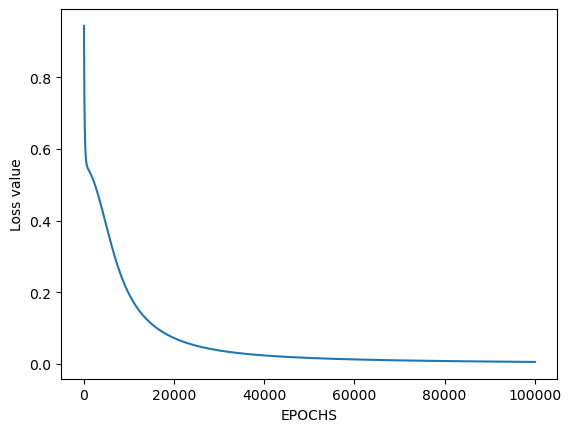

[[1. 0. 1. 1.]]


In [118]:
# Model to learn the NAND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # NAND input
Y = np.array([[1, 1, 1, 0]]) # NAND output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0],
              [0, 1, 0, 1]]) # NAND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

### Hidden Layer = 1   </br> No Of Neurons in First Hidden Layer = 2 </br> Epoch = 100000 </br> XOR GATE

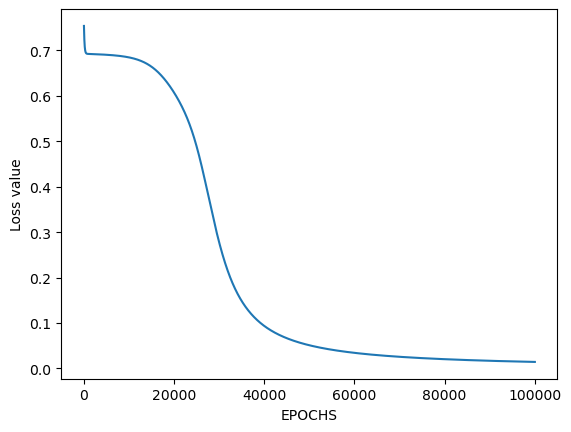

[[1. 0. 0. 1.]]


In [172]:
# Model to learn the NAND truth table
X = np.array([[0, 0, 1, 1], 
              [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output
 
# Define model parameters
neuronsInHiddenLayers = np.array([2]) # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
noOfLayers = int(len(parameters)/2)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache,noOfLayers) 
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0],
              [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)